## Liberary

In [71]:
from k_means_const_manhattan import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
from itertools import permutations

## Auxiliary functons

In [72]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

In [73]:
def check_location(delivery_loc, border):
    euc_pts = []
    man_pts = []

    for loc in delivery_loc:
        if loc[0] <= border[0][0]:
            euc_pts.append(loc)
        else:
            man_pts.append(loc)

    return euc_pts, man_pts

Visualization

In [74]:
def initial_plot(delivery_loc, border):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    # plot the border
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("Delivery Locations")
    plt.show()

In [75]:
def clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("After Clustering")
    plt.show()

In [102]:
def tsp_path_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    
    for i in range(len(euclidean_clusters)):
        path = euclidean_clusters[i]
        
        for j in range(len(path)-1):
            plt.plot((path[j][0],path[j+1][0]),(path[j][1],path[j+1][1]))

    for i in range(len(manhattan_clusters)):
        path = manhattan_clusters[i]
        
        for j in range(len(path)-1):
            plt.plot((path[j][0],path[j][0]),(path[j][1],path[j+1][1]))
            plt.plot((path[j][0],path[j+1][0]),(path[j+1][1],path[j+1][1]))
    
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("After Calculating shortest path")
    # plt.show()

In [101]:
def dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, dp):
    tsp_path_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border)
    plt.scatter(dp[0], dp[1],marker='X',c="red",s=200)

kMeans

In [77]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [78]:
# from k_means_constrained import KMeansConstrained
import k_means_constrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = k_means_constrained.KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

TSP

In [79]:
def calculate_path_distance(path, manhattan = False):
    distance = 0
    if not manhattan:
        for i in range(len(path)-1):
            distance += np.sqrt((path[i+1][0]-path[i][0])**2 + (path[i+1][1] - path[i][1])**2)
    else:
        for i in range(len(path)-1):
            distance += abs(path[i+1][0]-path[i][0]) + abs(path[i+1][1] - path[i][1])

    return distance

In [80]:
def tsp_euc(points):
    all_path = permutations(points)
    possible_path = []
    distance_list = []

    for path in all_path:
        path = list(path)
        distance = calculate_path_distance(path, manhattan = False)

        possible_path.append(path)
        distance_list.append(distance)

    idx = np.argmin(distance_list)
    result_path = possible_path[idx]

    return result_path

In [81]:
def tsp_man(points):
    all_path = permutations(points)
    possible_path = []
    distance_list = []

    for path in all_path:
        path = list(path)
        distance = calculate_path_distance(path, manhattan = True)

        possible_path.append(path)
        distance_list.append(distance)

    idx = np.argmin(distance_list)
    result_path = possible_path[idx]

    return result_path

CP creation

In [99]:
def create_euc_dp(euclidean_clusters, manhattan_clusters, border, method = "entry_exit"):
    entry_exit_point_euc = []
    entry_exit_point_man = []

    for cls_id, path in euclidean_clusters.items():
        entry_exit_point_euc.append(path[0])
        entry_exit_point_euc.append(path[-1])

    for cls_id, path in manhattan_clusters.items():
        entry_exit_point_man.append([border[0][0], path[0][1]])
        entry_exit_point_man.append([border[0][0], path[-1][1]])

    combined_points = entry_exit_point_euc + entry_exit_point_man

    x = [i for i,j in combined_points]
    y = [j for i,j in combined_points]

    return [np.mean(x), np.mean(y)]

## Main

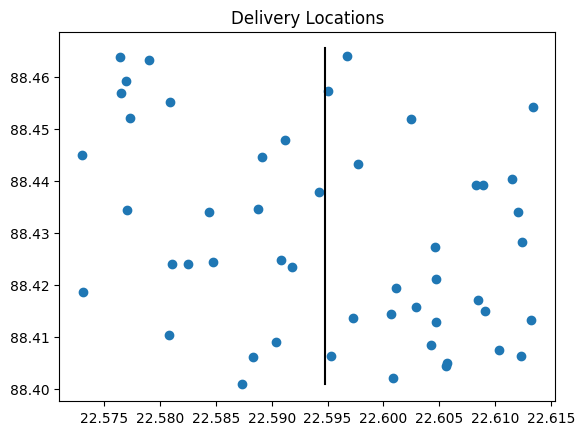

In [82]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
border = [[22.5948, 88.4010],[22.5948, 88.4654]]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc,border)

In [83]:
# separating euclidean and manhattan points
euclidean_points, manhattan_points = check_location(delivery_loc, border)

print(len(euclidean_points), len(manhattan_points))

23 27


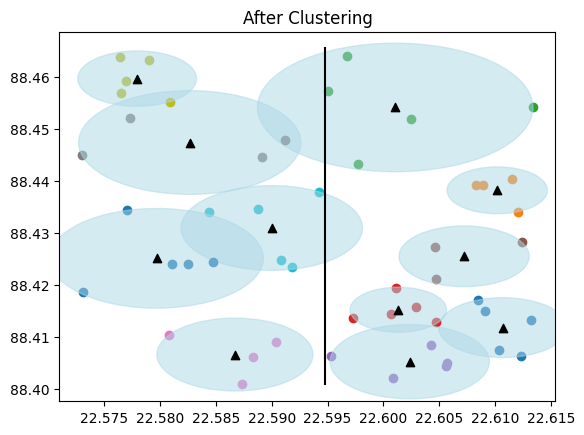

In [84]:
# Cluster the data and get the labels and centroids
manhattan_centroids, manhattan_clusters = KMeans(manhattan_points, len(manhattan_points), k)
euclidean_centroids, euclidean_clusters = KMeans(euclidean_points, len(euclidean_points), k)

# Visualize the data
clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border)

In [88]:
# apply tsp in each of the clusters
for cls_no, cluster in euclidean_clusters.items():
    euclidean_clusters[cls_no] = tsp_euc(cluster)

for cls_no, cluster in manhattan_clusters.items():
    manhattan_clusters[cls_no] = tsp_man(cluster)

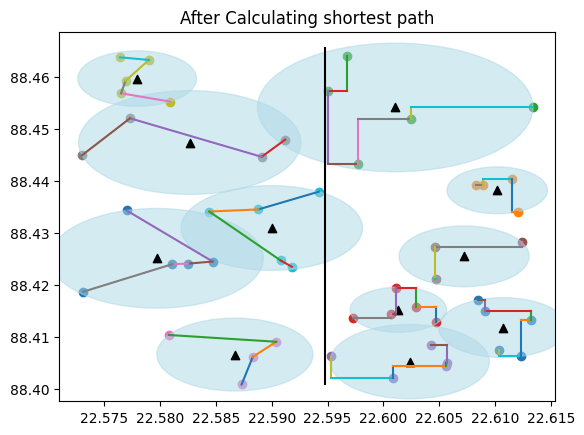

In [91]:
tsp_path_plot( euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border)

<font color="orange">Euclidean side dp</font>

Entry Exit Method

[22.589240909090915, 88.42926818181819]


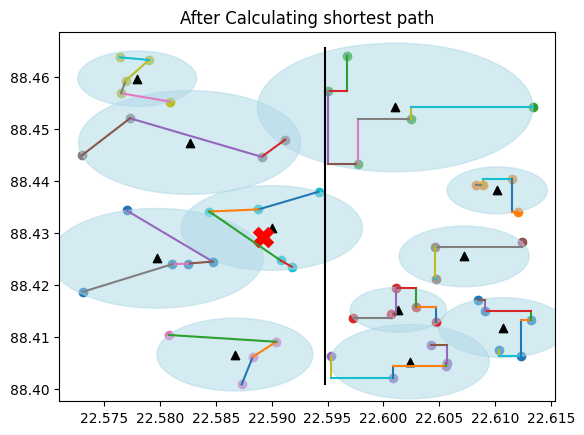

In [105]:
DP_1 = create_euc_dp(euclidean_clusters, manhattan_clusters, border, method="entry_exit")

print(DP_1)
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_1)

In [110]:
total_distance_1 = 0

euclidean_cluster_distance = 0
for cls_id, path in euclidean_clusters.items():
    temp_path = path.copy()
    temp_path.append(DP_1)
    temp_path.insert(0, DP_1)

    euclidean_cluster_distance += calculate_path_distance(temp_path, manhattan = False)

dp_to_border_distance = 0
for cls_id, path in manhattan_clusters.items():
    temp_path = []
    temp_path.append(DP_1)
    temp_path.append([border[0][0], path[0][1]])
    dp_to_border_distance += calculate_path_distance(temp_path, manhattan = False)

    temp_path = []
    temp_path.append([border[0][0], path[-1][1]])
    temp_path.append(DP_1)

    dp_to_border_distance += calculate_path_distance(temp_path, manhattan = False)

manhattan_cluster_distance = 0
for cls_id, path in manhattan_clusters.items():
    temp_path = path.copy()
    temp_path.append([border[0][0], path[-1][1]])
    temp_path.insert(0, [border[0][0], path[0][1]])

    manhattan_cluster_distance += calculate_path_distance(temp_path, manhattan = True)

total_distance_1 = euclidean_cluster_distance + dp_to_border_distance + manhattan_cluster_distance

print("Total distance in entry exit approach :",total_distance_1)

Total diistance in entry exit approach : 0.7910928900308957


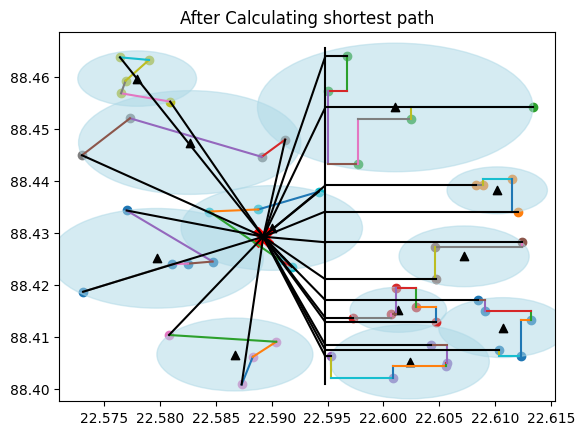

In [120]:
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_1)

for cls_id, path in euclidean_clusters.items():
    plt.plot(([DP_1[0],path[0][0]]),([DP_1[1],path[0][1]]),c="black")
    plt.plot(([DP_1[0],path[-1][0]]),([DP_1[1],path[-1][1]]), c="black")

for cls_id, path in manhattan_clusters.items():
    plt.plot([DP_1[0], border[0][0]],[DP_1[1], path[0][1]],c="black")
    plt.plot([DP_1[0], border[0][0]],[DP_1[1], path[-1][1]], c="black")

for cls_id, path in manhattan_clusters.items():
    plt.plot(([border[0][0],path[0][0]]),([path[0][1],path[0][1]]),c="black")
    plt.plot(([border[0][0],path[-1][0]]),([path[-1][1],path[-1][1]]), c="black")

Centroid method